# part 1

In [41]:
import pandas as pd
import numpy as np 


df = pd.read_csv('pred5.csv')
clinton_mean = df['Clinton'].mean()
clinton_std = df['Clinton'].std()

the csv file above is a filtered csv eliminating subgroups of pollster. derived from original csv file in upcoming tasks below.

In [42]:
clinton_mean

46.660377358490564

In [47]:
p = clinton_mean/100

In [50]:
import math

used N=100 since I calculated the percentage not the total observations.

In [54]:
SE = math.sqrt(p*(1-p)/100)

In [55]:
SE

0.049888344536698326

we usualy use z=1.96 for 95/100 CI in formula: p+-z*SE

In [56]:
CI = p-1.96*SE, p+1.96*SE
CI

(0.3688226182929769, 0.5643849288768343)

# part 2

In [29]:
import random

In [62]:
# def elect_simulation (N):
#     total = 0
#     outcomes = ['Clinton'] * 47 + ['Trump'] * 53
    
#     for _ in range(N):
#         result = random.choice(outcomes)
        
#         if result == 'Clinton':
#             total += 1
#         else:
#             pass
            
#     return (total/float(N))*100


def monte_carlo_simulation(N, simulations=100000):
    results = [np.random.binomial(1, 0.47, N).mean() for _ in range(simulations)]
    return results

N = 30
result = monte_carlo_simulation(N)
percent = 0
for r in result:
    SE_simulated = np.sqrt(r * (1 - r) / N)
    CI_lower = r - 1.96 * SE_simulated
    CI_upper = r + 1.96 * SE_simulated
    if r<=CI_upper and r>=CI_lower:
        percent += 1
percent = percent/1000        

In [63]:
result

[0.4666666666666667,
 0.5,
 0.4,
 0.4,
 0.36666666666666664,
 0.5333333333333333,
 0.5333333333333333,
 0.4666666666666667,
 0.5,
 0.6,
 0.3333333333333333,
 0.5333333333333333,
 0.5666666666666667,
 0.26666666666666666,
 0.5,
 0.5333333333333333,
 0.5333333333333333,
 0.4666666666666667,
 0.4666666666666667,
 0.36666666666666664,
 0.5666666666666667,
 0.4,
 0.5,
 0.5666666666666667,
 0.5,
 0.5,
 0.5666666666666667,
 0.4666666666666667,
 0.36666666666666664,
 0.4666666666666667,
 0.5666666666666667,
 0.43333333333333335,
 0.5333333333333333,
 0.36666666666666664,
 0.4,
 0.5666666666666667,
 0.36666666666666664,
 0.43333333333333335,
 0.4,
 0.43333333333333335,
 0.36666666666666664,
 0.4666666666666667,
 0.5666666666666667,
 0.3,
 0.5,
 0.5333333333333333,
 0.3333333333333333,
 0.5666666666666667,
 0.3,
 0.4666666666666667,
 0.36666666666666664,
 0.6,
 0.4666666666666667,
 0.4666666666666667,
 0.5,
 0.6,
 0.4666666666666667,
 0.4666666666666667,
 0.5,
 0.6,
 0.3,
 0.3333333333333333,
 0

In [64]:
CI_lower, CI_upper

(0.389341520656837, 0.7439918126764963)

In [65]:
percent

100.0

the result percentage is in our confidence interval.

# part 3

In [66]:
df = pd.read_csv('2016-general-election-trump-vs-clinton.csv')
df = df[['Trump', 'Clinton', 'Pollster', 'Start Date', 'Number of Observations', 'Mode']]
df = df.dropna()

df.to_csv('pred3.csv', index=False)
df

,Trump,Clinton,Pollster,Start Date,Number of Observations,Mode
0,41.0,45.0,Insights West,2016-11-04,940.0,Internet
4,43.0,41.0,IBD/TIPP,2016-11-04,1107.0,Live Phone
5,41.0,45.0,YouGov/Economist,2016-11-04,3669.0,Internet
6,6.0,90.0,YouGov/Economist,2016-11-04,1392.0,Internet
7,84.0,4.0,YouGov/Economist,2016-11-04,1110.0,Internet
...,...,...,...,...,...,...
1516,65.0,12.0,YouGov/Economist,2015-06-20,235.0,Internet
1517,34.0,45.0,YouGov/Economist,2015-06-20,266.0,Internet
1518,32.0,50.0,Quinnipiac,2015-05-19,1711.0,Live Phone
1519,5.0,89.0,Quinnipiac,2015-05-19,748.0,Live Phone


# part 4

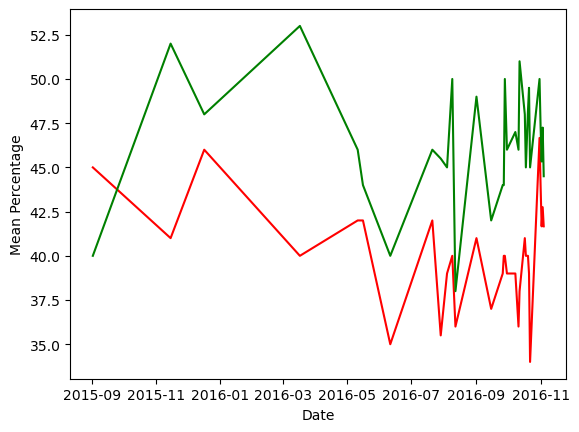

In [68]:
import matplotlib.pyplot as plt  

df = pd.read_csv('pred5.csv')
df = df.drop_duplicates(subset='Pollster', keep='first') #not needed has been cleaned already
df['Start Date'] = pd.to_datetime(df['Start Date'])
grouped_t = df.groupby(df['Start Date'].dt.date)['Trump'].mean()
grouped_c = df.groupby(df['Start Date'].dt.date)['Clinton'].mean()
# print(grouped_t)
# print(grouped_c)
T_df = grouped_t.reset_index()
T_df.columns = ['Start Date', 'percent']
C_df = grouped_c.reset_index()
C_df.columns = ['Start Date', 'percent']
plt.plot(T_df['Start Date'], T_df['percent'], 'r',C_df['Start Date'], C_df['percent'], 'g')
plt.xlabel('Date')
plt.ylabel('Mean Percentage')
plt.show()

# part 5

In [70]:
# df = pd.read_csv('pred5.csv')
sum = df['Number of Observations'].sum()
sum

136201.0

# part 6

In [72]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
grouped_t = df.groupby(df['Start Date'].dt.date)['Trump'].mean()
grouped_c = df.groupby(df['Start Date'].dt.date)['Clinton'].mean()
T_df = grouped_t.reset_index()
T_df.columns = ['Start Date', 'Trump']
C_df = grouped_c.reset_index()
C_df.columns = ['Start Date', 'Clinton']
new_df = pd.merge(T_df, C_df, on='Start Date')
new_df.to_csv('pred6.csv')
new_df

,Start Date,Trump,Clinton
0,2015-09-02,45.000000,40.000000
1,2015-11-15,41.000000,52.000000
2,2015-12-17,46.000000,48.000000
3,2016-03-17,40.000000,53.000000
4,2016-05-11,42.000000,46.000000
5,2016-05-16,42.000000,44.000000
6,2016-06-11,35.000000,40.000000
7,2016-07-21,42.000000,46.000000
8,2016-07-29,35.500000,45.500000
9,2016-08-04,39.000000,45.000000


# part 7

In [73]:
df = pd.read_csv('pred6.csv')
trump_mean = df['Trump'].mean()
trump_std = df['Trump'].std()
t_sigma = math.sqrt(trump_std)
clinton_mean = df['Clinton'].mean()
clinton_std = df['Clinton'].std()
c_sigma = math.sqrt(clinton_std)

In [74]:
trump_mean , clinton_mean

(40.10483870967742, 46.342473118279564)

In [75]:
t_sigma , c_sigma

(1.748606050349109, 1.864739580262184)

In [ ]:
p = trump_mean/100

In [ ]:
SE = math.sqrt(p*(1-p)/100)

In [76]:
trump_interval = p-1.96*SE, p+1.96*SE
trump_interval

(0.3688226182929769, 0.5643849288768343)

In [77]:
p = clinton_mean/100
SE = math.sqrt(p*(1-p)/100)
clinton_interval = p-1.96*SE, p+1.96*SE
clinton_interval

(0.36568728193791394, 0.5611621804276773)

# part 8

p and SE are as presented above.

In [78]:
p , SE

(0.46342473118279565, 0.0498660455331029)

In [79]:
diff = 1.96*SE
d = 2*p-1

In [80]:
d_CI = d-diff , d+diff
d_CI

(-0.1708879868792904, 0.02458691161047298)

𝐻0 : 𝑑 = 0 vs. 𝐻𝑎 : 𝑑 ≠ 0

the formula for t-statistic is: d*(n)^(1/2)/s 

In [83]:
from scipy import stats
n = 100
def t_test(d, s, pivot=0):
    t_stat = d*(10)/2*c_sigma
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-1))
    if p_value >= 0.05 or p_value <= -0.05:
        print("there is significant difference")
    else:
        print("there is not significant difference")
t_test(d, 2*c_sigma)        

there is significant difference
